# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler

import pandas as pd

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



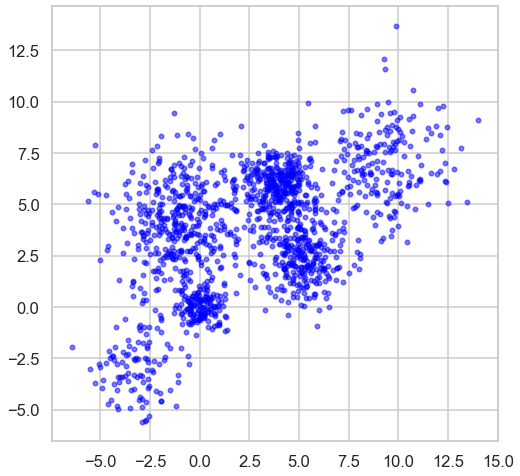

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)



### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:
culstering = KMeans(n_clusters=6, random_state= 5)
clusters=culstering.fit(Multi_blob_Data)
silhouette_score(Multi_blob_Data,culstering.predict(Multi_blob_Data))

0.4860593446953804

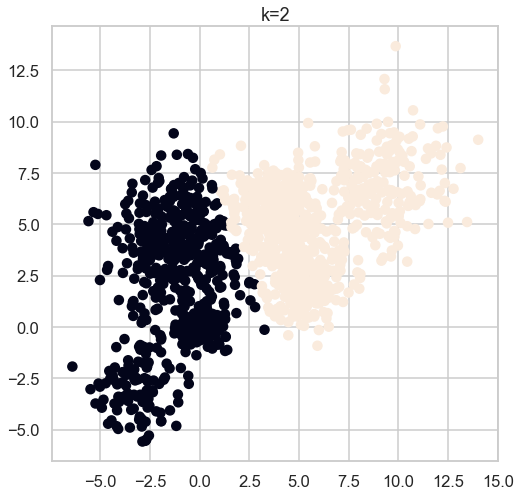

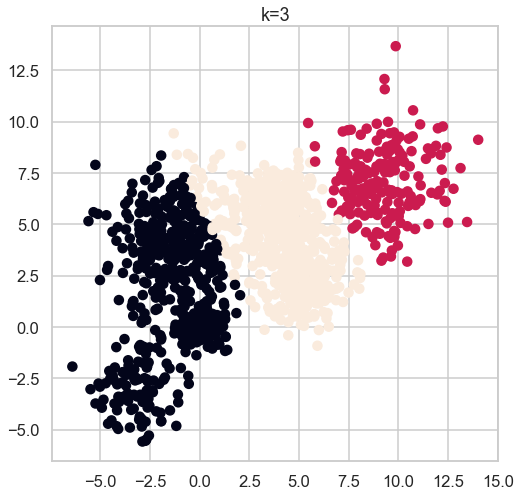

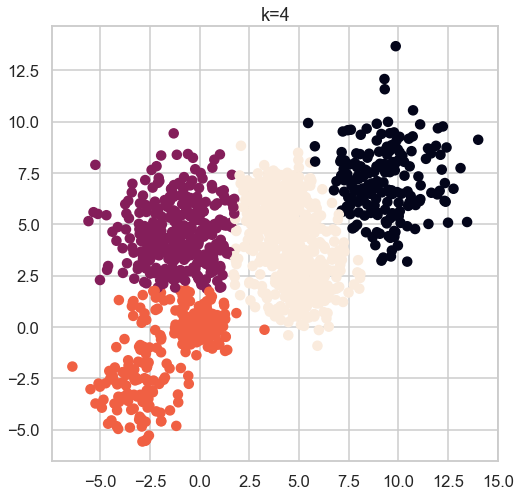

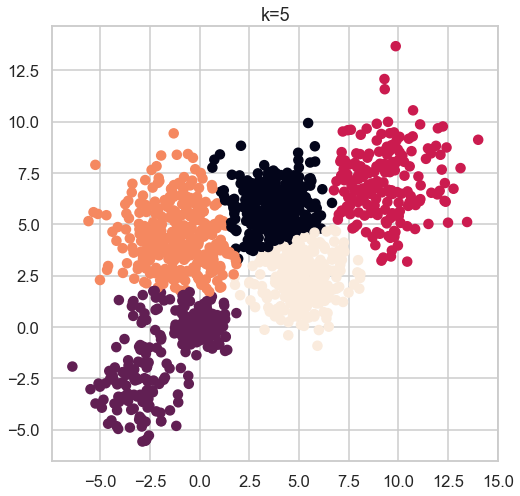

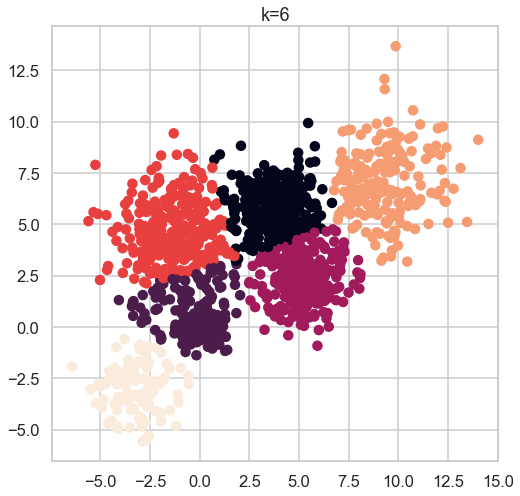

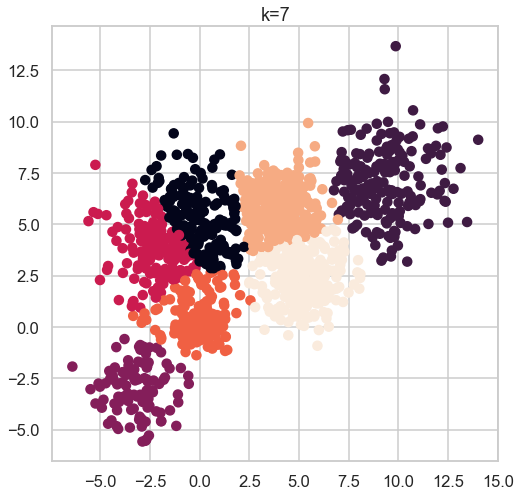

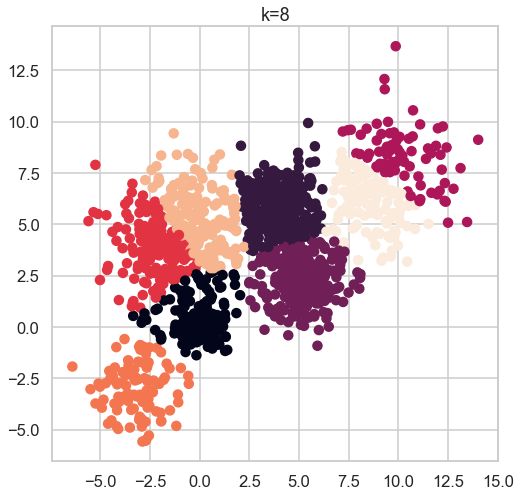

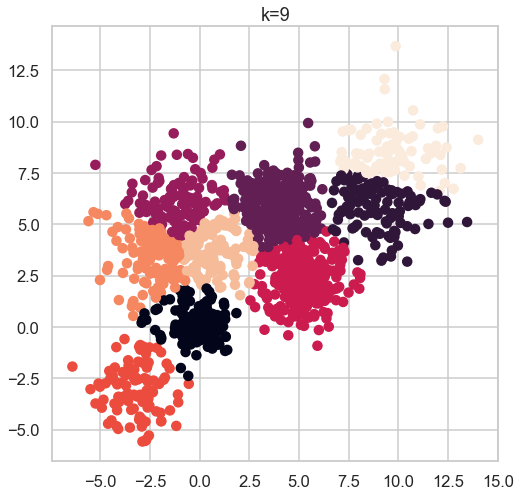

In [6]:
#Display the outcome of each value of K

k=[2,3,4,5,6,7,8,9]
for i in k:
    culstering = KMeans(n_clusters=i)
    clusters=culstering.fit(Multi_blob_Data)
    plt.title('k='+str(i))
    plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=KMeans(n_clusters=i, random_state= 5).fit(Multi_blob_Data).labels_.astype(float))
    plt.show()

   

In [7]:
#kmeans function


def kmeans(data):
    
    max_score=0
    best_k=0
    k=[2,3,4,5,6,7,8,9]
    
    for i in k:
        culstering = KMeans(n_clusters=i)
        clusters=culstering.fit(data)
        x=silhouette_score(data,culstering.predict(data))
        if x > max_score:
            max_score=x
            best_k=i
        print('silhouette score at k =',i,':',x)
    print('=================================================')    
    print('Best k:',best_k,', Best silhouette score:',max_score)
    return 
    

silhouette score at k = 2 : 0.4751544541991239
silhouette score at k = 3 : 0.43631793714185435
silhouette score at k = 4 : 0.4628725400351352
silhouette score at k = 5 : 0.48092962827116337
silhouette score at k = 6 : 0.4859737366910219
silhouette score at k = 7 : 0.46340972197949165
silhouette score at k = 8 : 0.4691857717522606
silhouette score at k = 9 : 0.44760824916329167
Best k: 6 , Best silhouette score: 0.4859737366910219


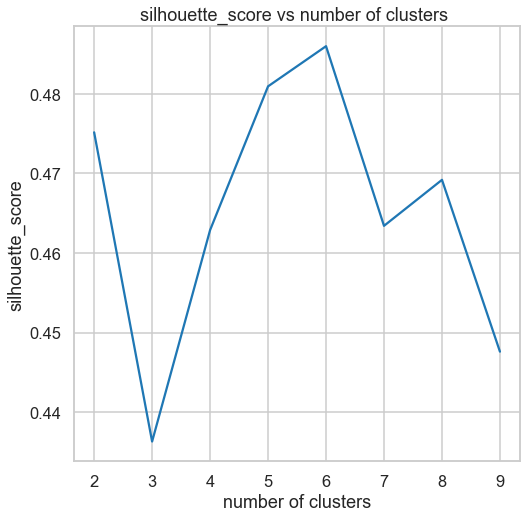

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

In [8]:
#Plot the silhouette_score versus K and use it to choose the best K


def kmeans_lst(data):
    
    lst=[]
    max_score=0
    best_k=0
    k=[2,3,4,5,6,7,8,9]
    
    for i in k:
        culstering = KMeans(n_clusters=i)
        clusters=culstering.fit(data)
        x=silhouette_score(data,culstering.predict(data))
        lst.append(x)
        if x > max_score:
            max_score=x
            best_k=i
        print('silhouette score at k =',i,':',x)
    print('=================================================')    
    print('Best k:',best_k,', Best silhouette score:',max_score)
    return lst
    
lst=kmeans_lst(Multi_blob_Data)


k=[2,3,4,5,6,7,8,9]
plt.plot(k, lst)
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.title('silhouette_score vs number of clusters ')
plt.show()
plt.figure(figsize=(7, 5))


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

Best silhouette_score: 0.4307906732655957
Linkage: average
Affinity: euclidean
distance_threshold: 6


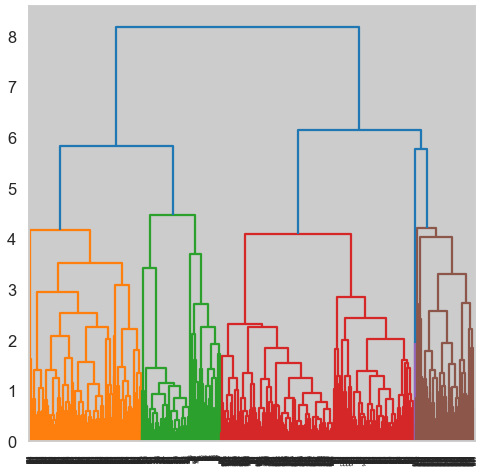

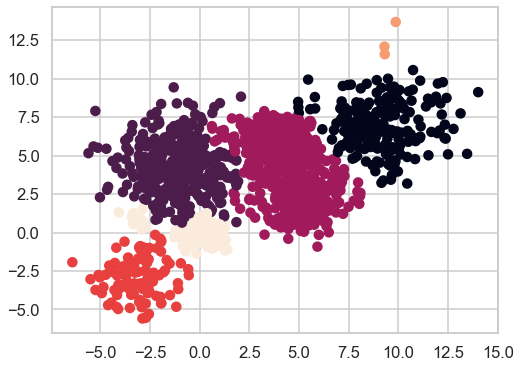

In [9]:
def hierarchal(data):

    affinity= ['euclidean', 'manhattan', 'cosine']
    linkage= ['average','single']
    aff=''
    link=''
    dis=-1
    distance=[None, 2, 6]
    max_score_Agg=0
    for i in affinity :
        for j in linkage :
            for d in distance:
                if d is None :
                    Agg = AgglomerativeClustering(n_clusters=6,affinity= i,linkage=j)
                else:
                    Agg = AgglomerativeClustering(n_clusters=None,affinity= i,linkage=j, distance_threshold=d)


                clusters_Agg = Agg.fit_predict(data) 
                if len(set(clusters_Agg)) == 1 :
                    x1= 0
                else :
                    x1=silhouette_score(data ,clusters_Agg)
                if x1 > max_score_Agg:
                    aff=i
                    link=j
                    max_score_Agg=x1
                    dis=d
                

    print('Best silhouette_score:',max_score_Agg)
    print('Linkage:',link)
    print('Affinity:',aff)
    print('distance_threshold:',d)

   
    return aff,link

aff,link=hierarchal(Multi_blob_Data)
dendro=sch.dendrogram(sch.linkage(Multi_blob_Data, method=link, metric=aff))

Agg = AgglomerativeClustering(n_clusters=6,affinity=aff ,linkage=link)
clusters_Agg_2 = Agg.fit(Multi_blob_Data)

plt.figure(figsize=(8, 6))
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=clusters_Agg_2.labels_.astype(float))


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

Best silhouette_score: 0.4685207355522043
eps: 2.1000000000000005
min Samples: 10


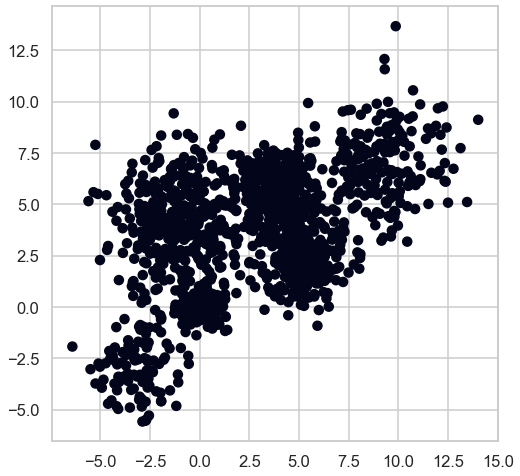

In [75]:

def DBScan(data):
    EPS = np.arange(0.1, 3.1, 0.2)
    Min_samples = np.arange(5,25,5)
    minSamples=-1
    eps=-1
    max_score_DB=0
    for i in EPS:
        for j in Min_samples :
            DB = DBSCAN(eps=i, min_samples=j)
            clusteringDB = DB.fit_predict(data)
            
            if len(set(DB.labels_)) != 1:
                x2 = silhouette_score(data,clusteringDB)
                if x2 > max_score_DB:
                    max_score_DB=x2
                    minSamples=j
                    eps=i

    print('Best silhouette_score:',max_score_DB)
    print('eps:',eps)
    print('min Samples:',minSamples)
    return

DBScan(Multi_blob_Data)

plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=DB.fit_predict(Multi_blob_Data).astype(float))


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

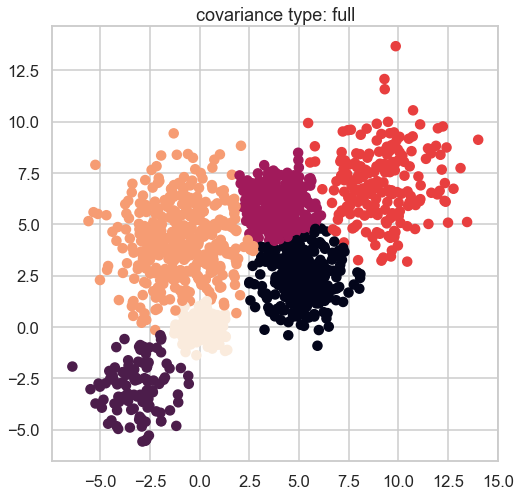

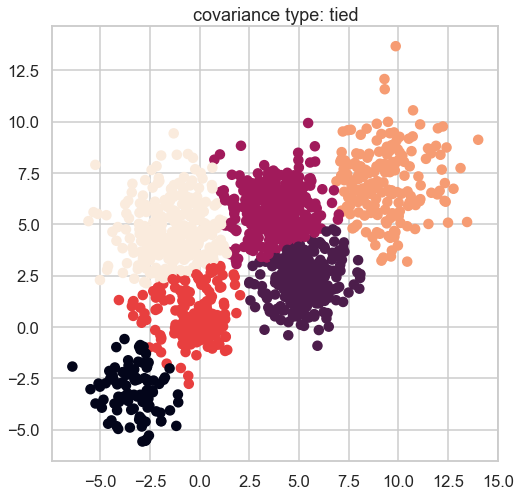

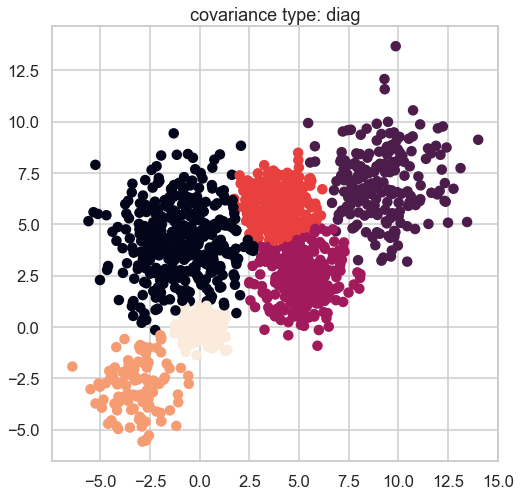

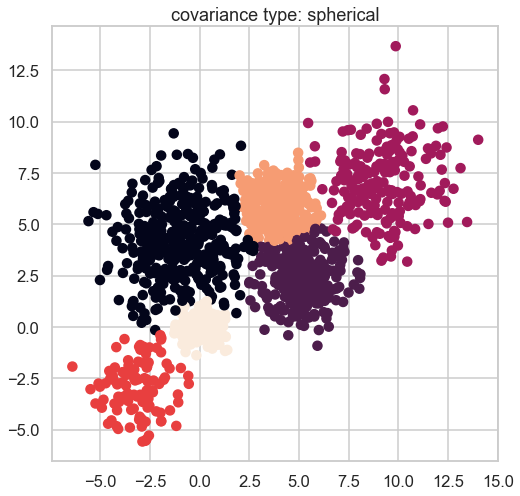

(0.48567327695888446, 'tied')

In [12]:
#with ploting
def gmm(data):
    max_score_gmm=0
    cov_types = ['full', 'tied', 'diag', 'spherical']
    for i in cov_types :
        gmm = GaussianMixture(n_components = 6, covariance_type= i)
        cluster_gmm = gmm.fit_predict(data)
        if len(set(cluster_gmm)) == 1 :
            x1= 0
        else :
            x1=silhouette_score(data ,cluster_gmm)
        
        if x1 > max_score_gmm:
            max_score_gmm=x1
            covariance_type=i
            
        plt.title('covariance type: '+str(i))
        plt.scatter(data[:,0], data[:,1], c=cluster_gmm.astype(float))
        plt.show()
    return max_score_gmm,covariance_type

gmm(Multi_blob_Data)

In [13]:

def Gmm(data):
    max_score_gmm=0
    cov_types = ['full', 'tied', 'diag', 'spherical']
    for i in cov_types :
        gmm = GaussianMixture(n_components = 6, covariance_type= i)
        cluster_gmm = gmm.fit_predict(data)
        if len(set(cluster_gmm)) == 1 :
            x1= 0
        else :
            x1=silhouette_score(data ,cluster_gmm)
        
        if x1 > max_score_gmm:
            max_score_gmm=x1
            covariance_type=i
        
    return max_score_gmm,covariance_type


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [15]:
from sklearn.datasets import load_iris
iris_data =load_iris()
# ["data"]
#iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
#list(iris_data.target_names)
#['setosa', 'versicolor', 'virginica']
iris_data  = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])



In [16]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
iris_data_Norm=iris_data.copy()
columns = ["sepal length (cm)",'sepal width (cm)','petal length (cm)','petal width (cm)'] 
for i in columns:
    iris_data_Norm[i] = MaxAbsScaler().fit_transform(iris_data[i].values.reshape(-1, 1))
    
iris_data_Norm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.645570,0.795455,0.202899,0.08,0.0
1,0.620253,0.681818,0.202899,0.08,0.0
2,0.594937,0.727273,0.188406,0.08,0.0
3,0.582278,0.704545,0.217391,0.08,0.0
4,0.632911,0.818182,0.202899,0.08,0.0


In [73]:
#Kmeans before Normalization
kmeans(iris_data)


silhouette score at k = 2 : 0.6800825549093842
silhouette score at k = 3 : 0.5818972375239807
silhouette score at k = 4 : 0.5422269440684723
silhouette score at k = 5 : 0.5248172494203045
silhouette score at k = 6 : 0.5190350320998496
silhouette score at k = 7 : 0.39183869935241905
silhouette score at k = 8 : 0.36340549134495576
silhouette score at k = 9 : 0.35713300769783524
Best k: 2 , Best silhouette score: 0.6800825549093842


In [72]:
#Kmeans After Normalization
kmeans(iris_data_Norm)

silhouette score at k = 2 : 0.6963931874227186
silhouette score at k = 3 : 0.8364287308641964
silhouette score at k = 4 : 0.6924344066052045
silhouette score at k = 5 : 0.5445475843522767
silhouette score at k = 6 : 0.5470555248021511
silhouette score at k = 7 : 0.3732043436609126
silhouette score at k = 8 : 0.36103345187082153
silhouette score at k = 9 : 0.3347714948636523
Best k: 3 , Best silhouette score: 0.8364287308641964


In [70]:
#Hierarchal Clustering before Normalization 
hierarchal(iris_data)

Best silhouette_score: 0.6825350504469877
Linkage: average
Affinity: manhattan
distance_threshold: 6


('manhattan', 'average')

In [71]:
#Hierarchal Clustering after Normalization 
hierarchal(iris_data_Norm)

Best silhouette_score: 0.6963931874227186
Linkage: average
Affinity: manhattan
distance_threshold: 6


('manhattan', 'average')

In [80]:
#DBscan before Normalization
DBScan(iris_data)


Best silhouette_score: 0.6825350504469877
eps: 1.1000000000000003
min Samples: 5


In [81]:
#DBscan after Normalization
DBScan(iris_data_Norm)

Best silhouette_score: 0.8364287308641964
eps: 0.30000000000000004
min Samples: 5


In [18]:
#gmm before Normalization
Gmm(iris_data)

(0.5186073996505165, 'spherical')

In [19]:
#gmm after Normalization
Gmm(iris_data_Norm)

(0.5409721027711076, 'spherical')

In [21]:

def pca(x,n=2):
    pca = PCA(n_components=n)
    return pca.fit_transform(x)

iris_pca=pca(iris_data_Norm,3)
    

iris_pca

array([[-1.13602323e+00,  1.33271993e-02, -6.71184720e-02],
       [-1.13309962e+00,  7.45633069e-02,  2.96332274e-02],
       [-1.14147454e+00,  7.23801311e-02, -1.40402034e-02],
       [-1.13373689e+00,  7.49450576e-02,  1.81893017e-02],
       [-1.13824686e+00,  8.96970924e-03, -8.58063718e-02],
       [-1.09893011e+00, -1.05653682e-01, -1.10273755e-01],
       [-1.12781844e+00,  3.02443989e-02, -3.75837316e-02],
       [-1.13221324e+00,  2.24239301e-02, -4.11865981e-02],
       [-1.13789989e+00,  1.12733932e-01,  5.11601560e-02],
       [-1.14323000e+00,  7.92919154e-02,  8.76197549e-03],
       [-1.13068958e+00, -3.00971975e-02, -1.00562498e-01],
       [-1.13062688e+00,  2.71631708e-02, -3.39426240e-02],
       [-1.14727533e+00,  1.01452255e-01,  2.20985871e-02],
       [-1.16491155e+00,  1.49225280e-01,  5.57155113e-03],
       [-1.14094890e+00, -6.30229122e-02, -1.78831291e-01],
       [-1.10853839e+00, -1.59461703e-01, -2.20093888e-01],
       [-1.11464074e+00, -7.95264647e-02

In [39]:
#Kmeans after pca 
kmeans(iris_pca)

silhouette score at k = 2 : 0.7067324749360082
silhouette score at k = 3 : 0.8616429521724748
silhouette score at k = 4 : 0.752141207045424
silhouette score at k = 5 : 0.6260721180195401
silhouette score at k = 6 : 0.4779445809647355
silhouette score at k = 7 : 0.45601492139644495
silhouette score at k = 8 : 0.42044714331044597
silhouette score at k = 9 : 0.41813714251958467
Best k: 3 , Best silhouette score: 0.8616429521724748


In [82]:
#hierarchal after pca
hierarchal(iris_pca)

Best silhouette_score: 0.6804159546801202
Linkage: average
Affinity: cosine
distance_threshold: 6


('cosine', 'average')

In [83]:
#DBScan after pca
DBScan(iris_pca)

Best silhouette_score: 0.8616429521724748
eps: 0.30000000000000004
min Samples: 5


In [22]:
#gmm after pca
Gmm(iris_pca)

(0.7084561903468076, 'full')

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [23]:

customer = pd.read_csv("Customer data.csv",index_col="ID")
customer.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [24]:

#normalization 
customer['Income'] = MaxAbsScaler().fit_transform(customer['Income'].values.reshape(-1, 1))
customer['Age'] = MaxAbsScaler().fit_transform(customer['Age'].values.reshape(-1, 1))
customer.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,0.881579,2,0.402988,1,2
100000002,1,1,0.289474,1,0.487364,1,2
100000003,0,0,0.644737,1,0.288366,0,0
100000004,0,0,0.592105,1,0.554573,1,1
100000005,0,0,0.697368,1,0.481733,1,1


In [84]:
#Kmeans

kmeans(customer)

silhouette score at k = 2 : 0.33367170175108457
silhouette score at k = 3 : 0.31295112391917734
silhouette score at k = 4 : 0.2980534678652913
silhouette score at k = 5 : 0.2909989509623487
silhouette score at k = 6 : 0.3153383087996485
silhouette score at k = 7 : 0.3382844597093601
silhouette score at k = 8 : 0.3527609836325562
silhouette score at k = 9 : 0.36559169875173425
Best k: 9 , Best silhouette score: 0.36559169875173425


In [85]:
hierarchal(customer)

Best silhouette_score: 0.32876209162708453
Linkage: average
Affinity: manhattan
distance_threshold: 6


('manhattan', 'average')

In [86]:
#DBscan
DBScan(customer)

Best silhouette_score: 0.8330888236776491
eps: 0.5000000000000001
min Samples: 5


In [25]:
#gmm 
Gmm(customer)

(0.29730347660412015, 'full')

In [27]:
customer_pca=pca(customer,3)
customer_pca

array([[ 1.28817963,  0.39218158,  1.0661046 ],
       [ 0.94211101,  0.59609998, -0.67663441],
       [-0.8702714 , -0.65772952,  0.69695164],
       ...,
       [-0.87915443, -1.38528784, -0.01962032],
       [-1.2120087 ,  0.27315904, -0.32457309],
       [-0.88594523, -1.39258776, -0.0396222 ]])

In [88]:
kmeans(customer_pca)

silhouette score at k = 2 : 0.40131539971670904
silhouette score at k = 3 : 0.3831334513744508
silhouette score at k = 4 : 0.38036680263910844
silhouette score at k = 5 : 0.40433324779504376
silhouette score at k = 6 : 0.42990298504742885
silhouette score at k = 7 : 0.44222841751706093
silhouette score at k = 8 : 0.46983882460890924
silhouette score at k = 9 : 0.4893706961094286
Best k: 9 , Best silhouette score: 0.4893706961094286


In [89]:
hierarchal(customer_pca)

Best silhouette_score: 0.4230960726820955
Linkage: average
Affinity: cosine
distance_threshold: 6


('cosine', 'average')

In [91]:
DBScan(customer_pca)

Best silhouette_score: 0.8885405783342317
eps: 0.1
min Samples: 5


In [28]:
#gmm 
Gmm(customer_pca)

(0.37065557037656083, 'tied')